# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [2]:
# your code here
fitbit = pd.read_csv ('../data/Fitbit2.csv')
fitbit


,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

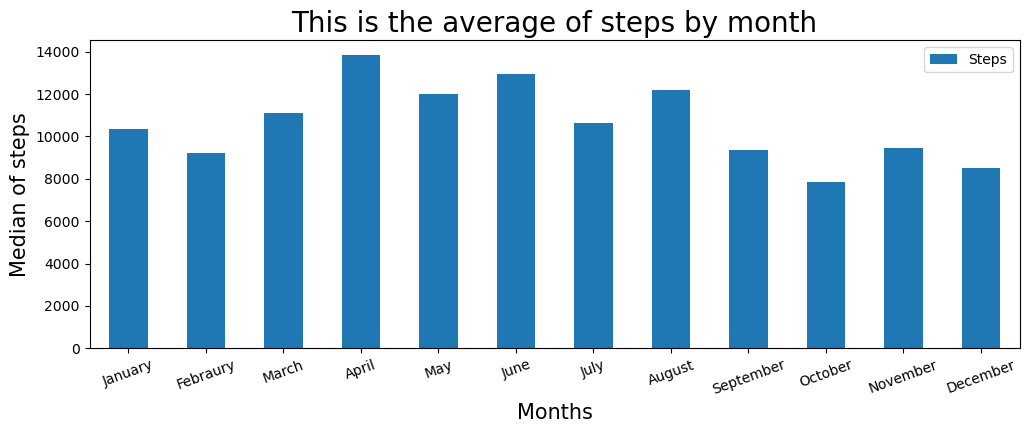

In [3]:
# AVERAGE STEPS BY MONTH_ENCODED
# your code here
fitbit[['Steps', 'Months_encoded']]
average_steps_mth = fitbit.groupby(['Months_encoded']).agg({'Steps':'median'})
average_steps_mth.plot(kind='bar',figsize= (12,4) )
plt.xticks(np.arange (12), ['January','Febraury','March','April','May','June','July','August','September','October','November','December'], rotation=20)
plt.ylabel("Median of steps", fontsize=15);
plt.xlabel("Months", fontsize=15);
plt.title("This is the average of steps by month", fontsize = 20);
#plt.sca?

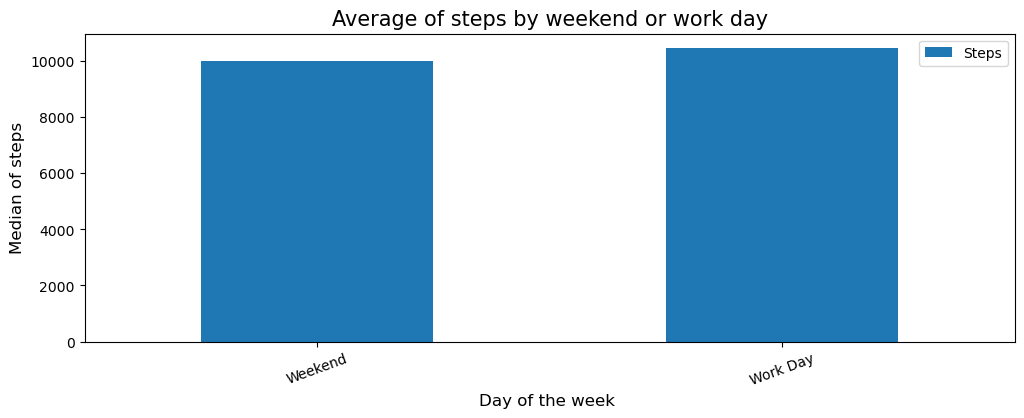

In [4]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
# your code here
average_steps_day = fitbit.groupby(['Work_or_Weekend']).agg({'Steps':'median'})
average_steps_day.plot(kind='bar',figsize= (12,4))
plt.xticks([0,1], ['Weekend','Work Day'], rotation=20)
plt.ylabel("Median of steps", fontsize=12);
plt.xlabel("Day of the week ", fontsize=12);
plt.title("Average of steps by weekend or work day", fontsize = 15);
#plt.sca?

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [48]:
fitbit.sample()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
209,2015-12-03,3165,10784,8.04,14,774.0,201,25,68,16,...,4.995823,Thursday,3.0,1,6.733333,90.178571,5.416667,93.390805,December,12


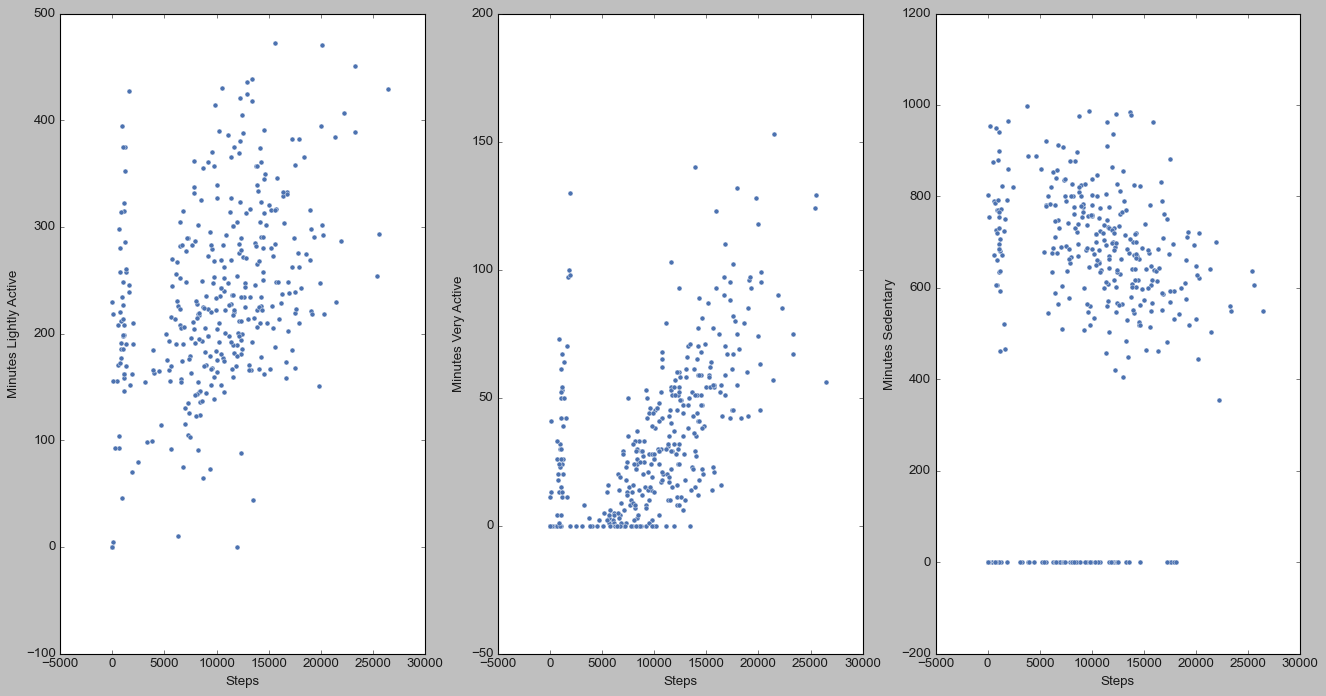

In [70]:
# your code here
x_axis ='Steps'
y_columns =  ['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary']
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
sns.set(rc={"figure.figsize": (12.,6.)})

counter =  0

for i in y_columns: 
    sns.scatterplot (x=x_axis, y=i, data = fitbit, ax=axs[counter])
    counter += 1
    
     

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [6]:
# your code here
#titanic=sns.load_dataset("titanic")
titanic = pd.read_csv('../data/titanic.csv')
titanic
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [7]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [8]:
# NUMERICAL VARIABLES
# your code here
#transformo los datos de la columna survived en integer ya que es una variable categorica 


titanic.dropna(inplace=True, subset = ['Survived']) #Dropeo los nans para poder transformar el tipo de la columna
titanic.Survived = titanic.Survived.astype('int64') #transformo en integer lso datos de la columna
numerical = titanic.select_dtypes(include='float64')
numerical
#Las columnas de tipos integer son categoricas, utilizan numeros para representar categorias


,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,17.914803,23.4500
889,26.000000,30.0000


In [9]:
# CATEGORICAL VARIABLES
# your code here
categorical = titanic.select_dtypes(exclude = 'float64')
categorical

,PassengerId,Survived,Pclass,Name,Gender,SibSp,Parch,Ticket,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,U0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,U0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,U0,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,U0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,U0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,C148,C


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [37]:
# your code here
#Matplolib: 
plt.style.use('classic')
plt.figure(figsize=(12, ))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

AxesSubplot(0.125,0.1;0.775x0.8)


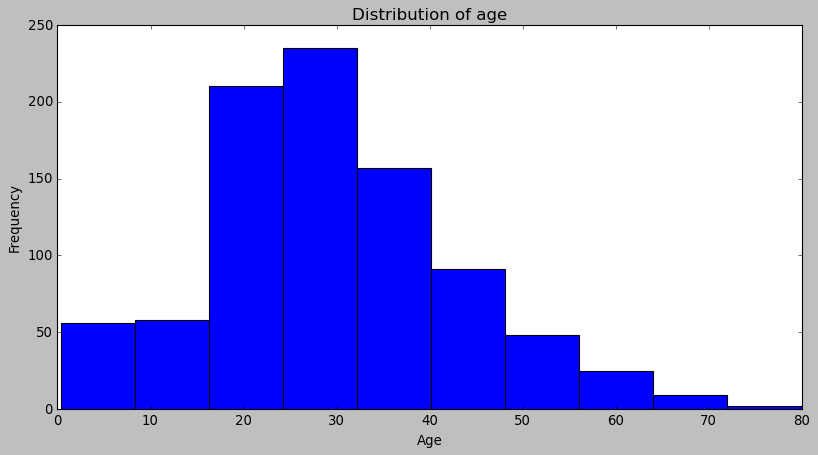

In [40]:
# your code here
#titanic.age.isna().sum() #Hay 177 nan en age
#Matplotlib: histogram --> with nan values as 0
titanic_age=titanic.Age.plot.hist(figsize=(12,6))
plt.xlabel("Age", fontsize=12);
plt.title ("Distribution of age", fontsize=15)
print (titanic_age)


#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

<AxesSubplot:ylabel='Frequency'>

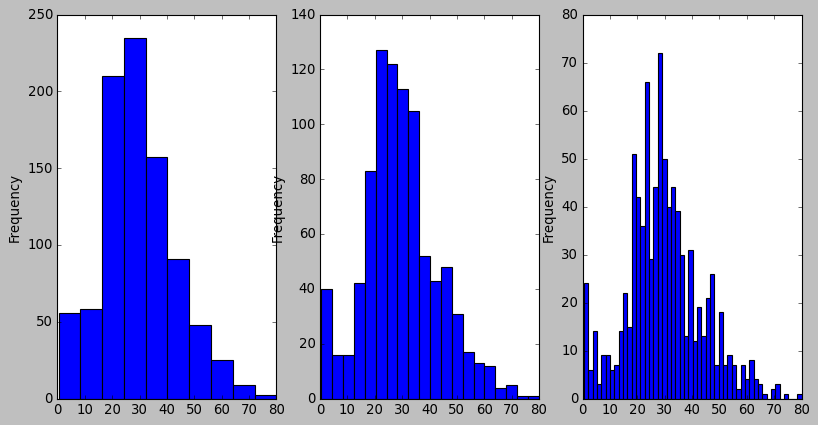

In [12]:
# your code here
fig, axs = plt.subplots(nrows =1, ncols=3,figsize = (25,10)) #En una fila los tres graficos con bins diferentes

titanic.Age.plot.hist(bins=10,figsize=(12,6), ax=axs[0])
titanic.Age.plot.hist(bins=20,figsize=(12,6), ax=axs[1])
titanic.Age.plot.hist(bins=50,figsize=(12,6),ax=axs[2])

#### How does the bin size affect your plot?

In [13]:
"""Como mayor es el bin, más barras me da, es decir, que el intervalo de rango se reduce. 
"""

'Como mayor es el bin, más barras me da, es decir, que el intervalo de rango se reduce. \n'

#### Use seaborn to show the distribution of column `Age`.

<AxesSubplot:xlabel='Age', ylabel='Count'>

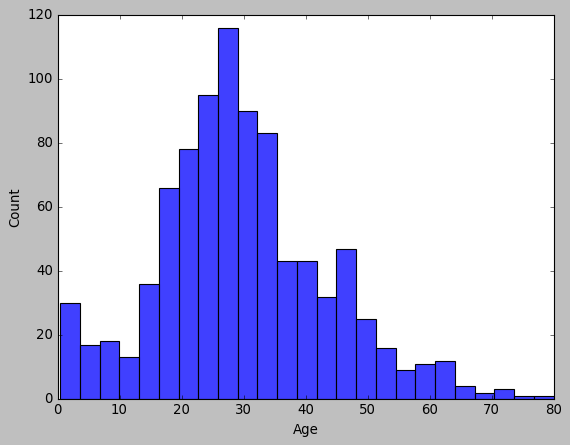

In [14]:
# your code here -- seaborn
sns.histplot(x=titanic.Age)


#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

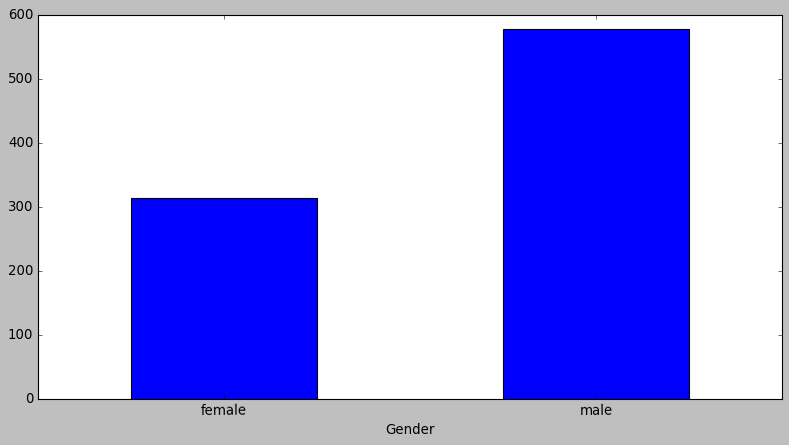

In [15]:
# Method 1 - matplotlib
# your code here

Gender_plot = pd.DataFrame(titanic.groupby(["Gender"]) ['Gender'].count()) #Te cuenta la cantidad de females y males 
Gender_plot.plot(kind ='bar',figsize = (12,6),legend=False)
plt.xticks(rotation=0.5);

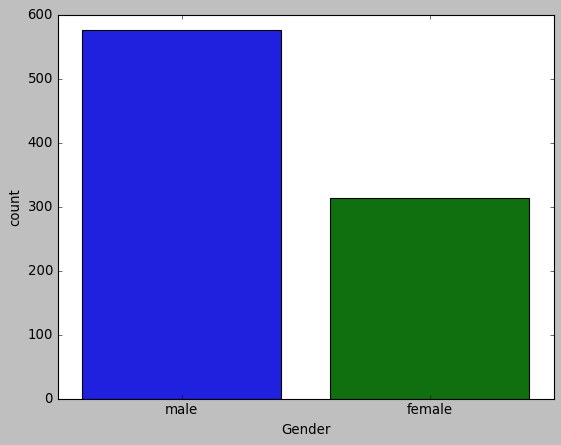

In [16]:
# Method 2 - seaborn
# your code here
sns.countplot(x="Gender", data = titanic);

#### Use the right plot to visualize the column `Pclass`.

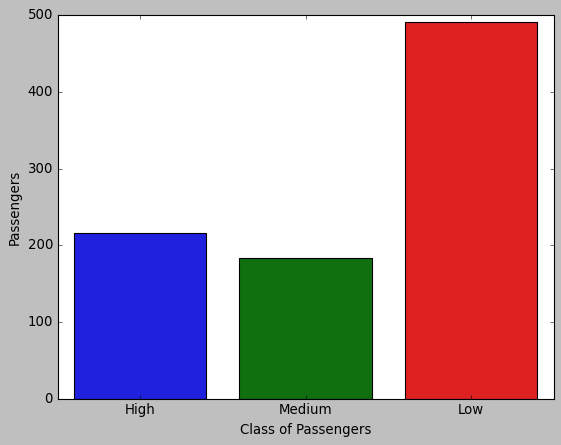

In [17]:
# your code here
sns.countplot(x="Pclass", data = titanic);
plt.xticks(np.arange (3), ['High','Medium','Low'], rotation=0)
plt.ylabel("Passengers", fontsize=12);
plt.xlabel("Class of Passengers", fontsize=12);

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

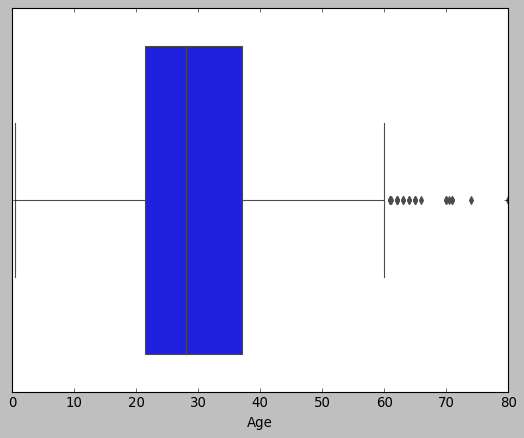

In [18]:
# your code here
# Para tener un resumen estadístico de la columna age, usamos el boxplot. 

age_boxplt = sns.boxplot(x="Age", data=titanic)

In [19]:
print (f'El minimo de age es: {titanic.Age.min()}')
print (f'El máximo de age es: {titanic.Age.max()}')
print (f'La mediana de age es: {titanic.Age.dropna().median()}')
print (f'El primer quartil de age es: {titanic.Age.quantile (.25)}')
print (f'El tercer quartil de age es: {titanic.Age.quantile (.75)}')
print (f'El segundo quartil de age es: {titanic.Age.quantile (.50)}')

IQR = titanic.Age.quantile (.75) - titanic.Age.quantile (.25)
Whisker = IQR * 1.5
Max_sinoutlier= Whisker + titanic.Age.quantile (.75)
Max_sinoutlier

El minimo de age es: 0.42
El máximo de age es: 80.0
La mediana de age es: 28.0470285
El primer quartil de age es: 21.3449880662
El tercer quartil de age es: 37.0
El segundo quartil de age es: 28.0470285


60.4825179007

In [20]:
"""
Con el boxplot sabemos:
1. El mínimo de age: 0.42
2. El máximo de age sin outliers es Whisker + 3r Quartil
3. Los puntos entre 60 y 80 los considera outliers de la muestra 
4. El primer quartil indica que el 25% de los valores son iguales o menores a aprox 21.34
5. El segundo quartil correponde a la mediana 
6. El tercer quartil indica que el 75% de los valores son iguales o menores a aprox 37

"""

'\nCon el boxplot sabemos:\n1. El mínimo de age: 0.42\n2. El máximo de age sin outliers es Whisker + 3r Quartil\n3. Los puntos entre 60 y 80 los considera outliers de la muestra \n4. El primer quartil indica que el 25% de los valores son iguales o menores a aprox 21.34\n5. El segundo quartil correponde a la mediana \n6. El tercer quartil indica que el 75% de los valores son iguales o menores a aprox 37\n\n'

#### What does the last plot tell you about the feature `Age`?

In [21]:
"""
your comments here
"""

'\nyour comments here\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [22]:
# your code here


#### What additional information does the last plot provide about feature `Age`?

In [23]:
"""
your comments here
"""

'\nyour comments here\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

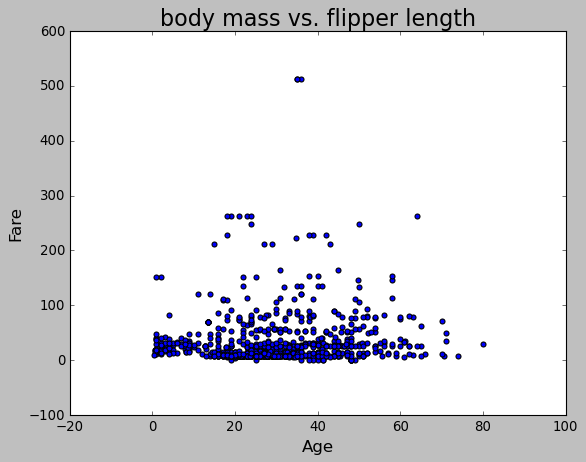

In [24]:
# Method 1 - matplotlib
# your code here
plt.scatter(x=titanic.Age, y=titanic.Fare)
plt.xlabel("Age", fontsize=15);
plt.ylabel("Fare", fontsize=15);
plt.title("body mass vs. flipper length", fontsize = 20);

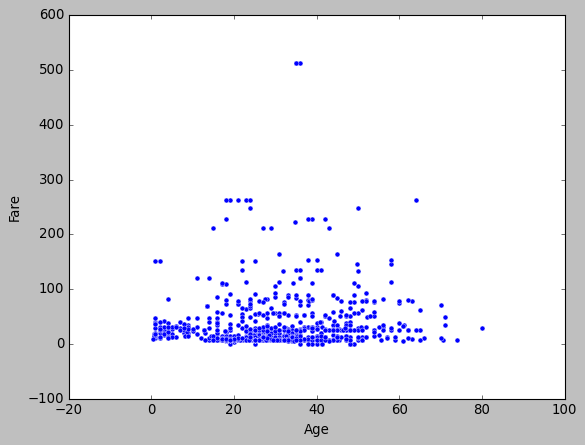

In [25]:
# Method 2 - seaborn
# your code here
sns.scatterplot(x="Age", y="Fare", data=titanic);

In [26]:
"""No hay relacion lineal entre las dos variables, lo que han pagado los pasajeros no depende de la edad."""

'No hay relacion lineal entre las dos variables, lo que han pagado los pasajeros no depende de la edad.'

#### Plot the correlation matrix using seaborn.

In [27]:
# your code here
corr = titanic.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033528,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.398113,0.083081,0.018443,-0.549500
Age,0.033528,-0.065376,-0.398113,1.000000,-0.311580,-0.216288,0.094795
SibSp,-0.057527,-0.035322,0.083081,-0.311580,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.216288,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.094795,0.159651,0.216225,1.000000


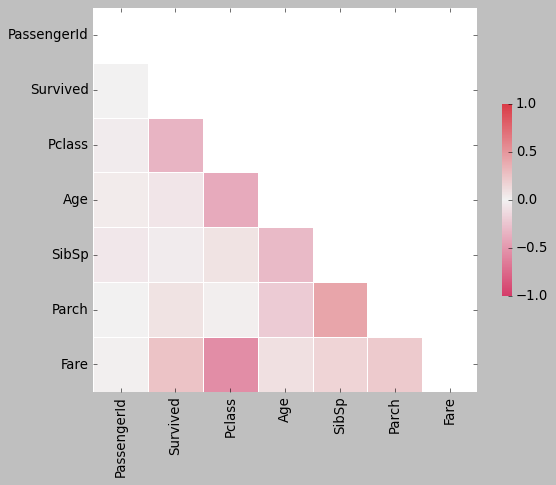

In [28]:
mask = np.triu(np.ones_like(corr, dtype=bool)) 
color_map = sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(corr,  
            mask = mask,
            cmap=color_map,
            square=True,
            linewidth=0.5,
            vmax=1, #defining max range
            vmin=-1, #defining min range
            cbar_kws={"shrink": .5} #steps for the scale
);

#### What are the most correlated features?

In [29]:
"""
Las variables con mayor correlación son Pclass-Fare, Pclass - Age, SibSp - Parch, Survived-Pclass, Age-SibsP
"""

'\nLas variables con mayor correlación son Pclass-Fare, Pclass - Age, SibSp - Parch, Survived-Pclass, Age-SibsP\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

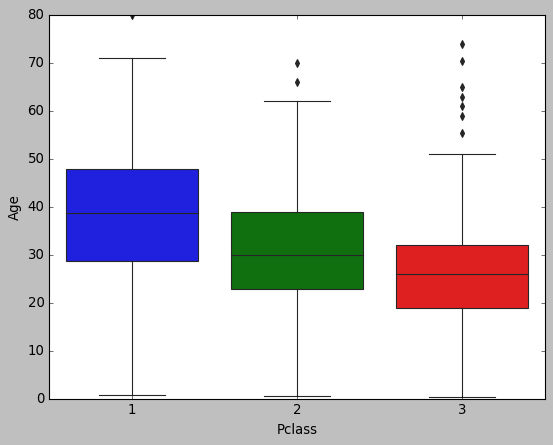

In [30]:
# your code here - Boxplot the age depending on each class
sns.boxplot(x="Pclass", y="Age", data=titanic)

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

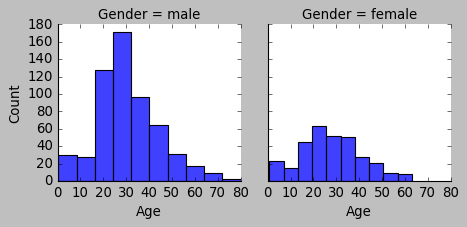

In [36]:
# your code here
g = sns.FacetGrid(titanic, col="Gender")
g.map_dataframe(sns.histplot, x="Age",bins=10)